# Examples for Lecture 4

We will be covering two principal areas:

 * A few types of aggregation -- counting, average, weighted average, sum
 * The "building inventory" dataset, and some simple pandas operations on it

In [1]:
!wget https://uiuc-ischool-dataviz.github.io/spring2019online/week02/building_inventory.csv

--2020-09-03 15:49:58--  https://uiuc-ischool-dataviz.github.io/spring2019online/week02/building_inventory.csv
Resolving uiuc-ischool-dataviz.github.io (uiuc-ischool-dataviz.github.io)... 185.199.111.153, 185.199.110.153, 185.199.108.153, ...
Connecting to uiuc-ischool-dataviz.github.io (uiuc-ischool-dataviz.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1994275 (1.9M) [text/csv]
Saving to: ‘building_inventory.csv.2’

building_inventory. 100%[===================>]   1.90M  --.-KB/s    in 0.04s   

2020-09-03 15:49:58 (45.6 MB/s) - ‘building_inventory.csv.2’ saved [1994275/1994275]



In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("building_inventory.csv")

In [5]:
df.columns

Index(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County',
       'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name',
       'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired',
       'Year Constructed', 'Square Footage', 'Total Floors',
       'Floors Above Grade', 'Floors Below Grade', 'Usage Description',
       'Usage Description 2', 'Usage Description 3'],
      dtype='object')

In [6]:
df.dtypes

Agency Name                object
Location Name              object
Address                    object
City                       object
Zip code                    int64
County                     object
Congress Dist               int64
Congressional Full Name    object
Rep Dist                    int64
Rep Full Name              object
Senate Dist                 int64
Senator Full Name          object
Bldg Status                object
Year Acquired               int64
Year Constructed            int64
Square Footage              int64
Total Floors                int64
Floors Above Grade          int64
Floors Below Grade          int64
Usage Description          object
Usage Description 2        object
Usage Description 3        object
dtype: object

In [7]:
df.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


In [8]:
df.describe()

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8862.000000,8.862000e+03,8862.000000,8862.000000,8862.000000
mean,61821.076845,13.404085,92.303318,46.408599,1913.267660,1906.135184,1.147603e+04,1.636087,1.449334,0.161589
std,1095.203357,4.037936,23.568457,11.781038,337.024796,351.180642,3.817263e+04,1.537603,1.286898,0.392717
min,1235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,61105.000000,12.000000,79.000000,40.000000,1957.000000,1953.000000,2.330000e+02,1.000000,1.000000,0.000000
50%,62023.000000,14.000000,97.000000,49.000000,1975.000000,1974.000000,1.600000e+03,1.000000,1.000000,0.000000
75%,62650.000000,16.000000,110.000000,55.000000,1992.000000,1991.000000,6.426500e+03,2.000000,1.000000,0.000000
max,68297.000000,18.000000,119.000000,60.000000,2019.000000,2019.000000,1.200000e+06,31.000000,30.000000,4.000000


In [9]:
df.shape

(8862, 22)

In [10]:
(df["Year Acquired"] == 0).sum()

265

In [11]:
(df["Year Constructed"] == 0).sum()

289

In [12]:
(df["Square Footage"] == 0).sum()

57

In [13]:
df = pd.read_csv("building_inventory.csv", na_values={
    "Year Acquired": 0,
    "Year Constructed": 0,
    "Square Footage": 0
})

In [14]:
df.describe()

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,8862.000000,8862.000000,8862.000000,8862.000000,8597.000000,8573.000000,8.805000e+03,8862.000000,8862.000000,8862.000000
mean,61821.076845,13.404085,92.303318,46.408599,1972.243573,1970.391928,1.155032e+04,1.636087,1.449334,0.161589
std,1095.203357,4.037936,23.568457,11.781038,27.549380,29.326256,3.828480e+04,1.537603,1.286898,0.392717
min,1235.000000,0.000000,0.000000,0.000000,1753.000000,1753.000000,9.000000e+00,0.000000,0.000000,0.000000
25%,61105.000000,12.000000,79.000000,40.000000,1959.000000,1957.000000,2.400000e+02,1.000000,1.000000,0.000000
50%,62023.000000,14.000000,97.000000,49.000000,1976.000000,1975.000000,1.664000e+03,1.000000,1.000000,0.000000
75%,62650.000000,16.000000,110.000000,55.000000,1993.000000,1991.000000,6.528000e+03,2.000000,1.000000,0.000000
max,68297.000000,18.000000,119.000000,60.000000,2019.000000,2019.000000,1.200000e+06,31.000000,30.000000,4.000000


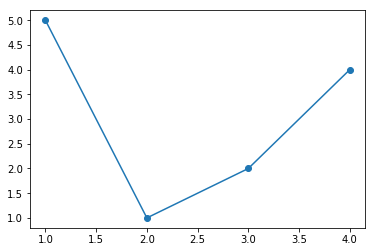

In [15]:
plt.plot([1,2,3,4], [5, 1, 2, 4], "-o")

In [16]:
plt.rcParams["figure.dpi"] = 200

Text(0,0.5,'Year Acquired')

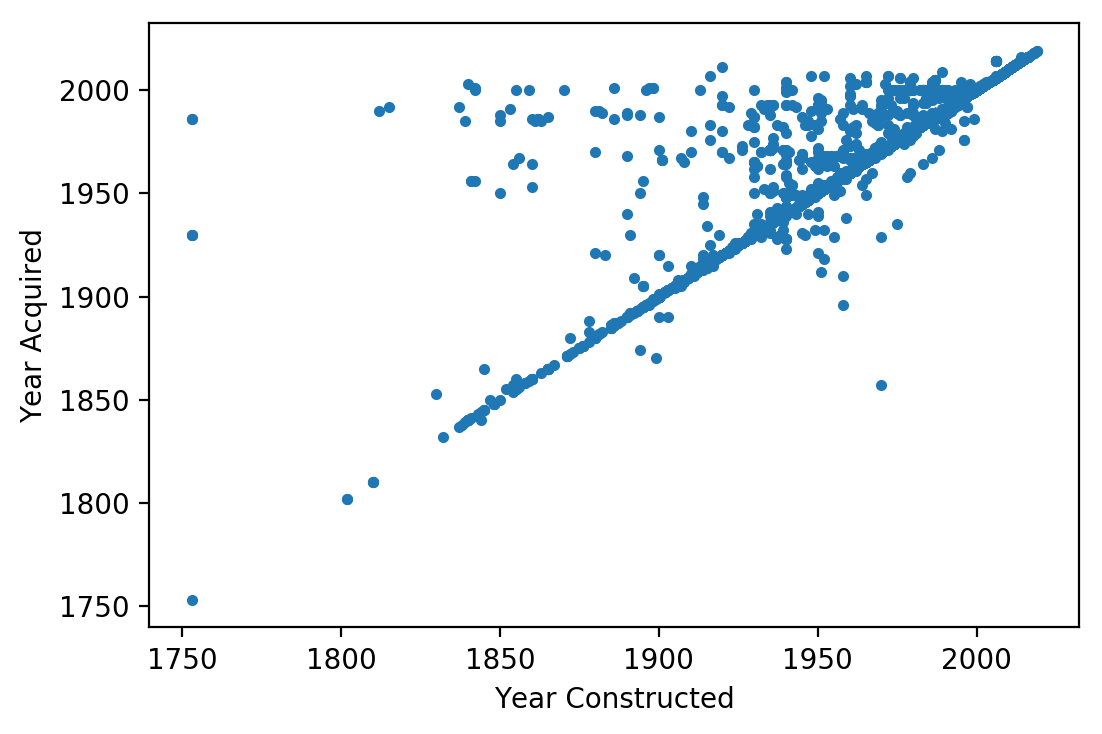

In [17]:
plt.plot(df["Year Constructed"], df["Year Acquired"], '.')
plt.xlabel("Year Constructed")
plt.ylabel("Year Acquired")

In [18]:
df["Age at Acquisition"] = df["Year Acquired"] - df["Year Constructed"]

In [19]:
df["Age at Acquisition"].describe()

count    8544.000000
mean        1.810276
std        12.015887
min      -113.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       233.000000
Name: Age at Acquisition, dtype: float64

In [20]:
old_buildings = df[
    df["Age at Acquisition"] >= 0
]

Text(0,0.5,'Count')

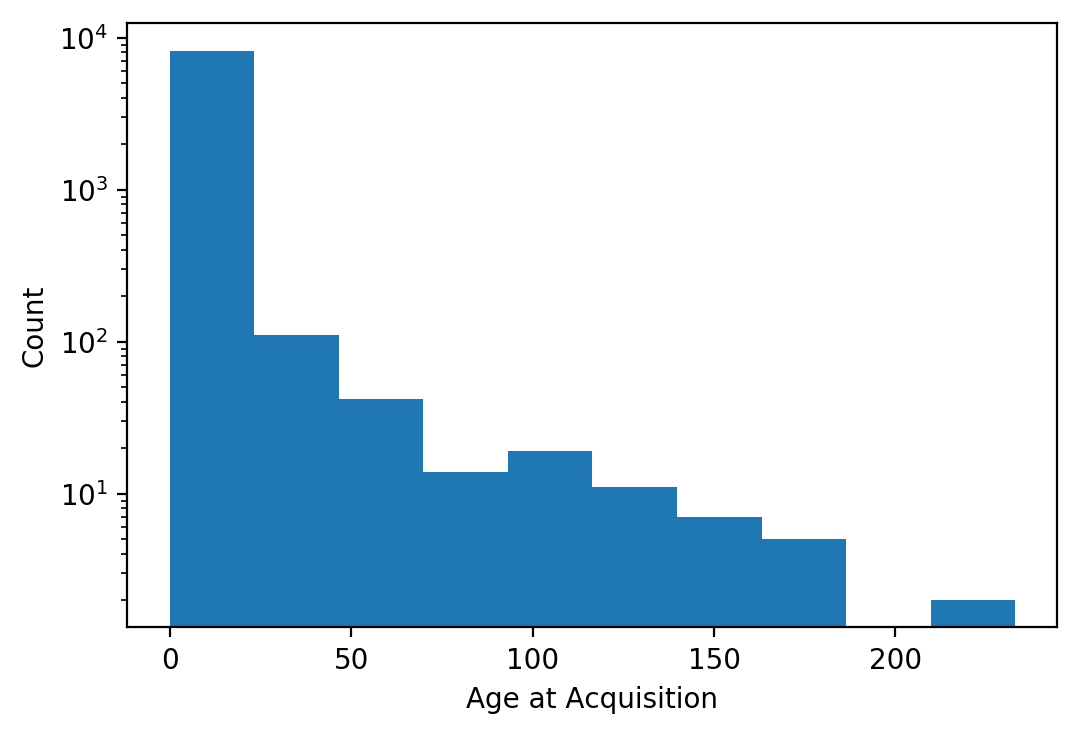

In [21]:
plt.hist(old_buildings["Age at Acquisition"], log=True)
plt.xlabel("Age at Acquisition")
plt.ylabel("Count")

In [22]:
df["Agency Name"].unique()

array(['Department of Natural Resources', 'Department of Corrections',
       'Department of Human Services', 'Department of Transportation',
       'Department of State Police', 'Department of Military Affairs',
       'Department of Agriculture', 'Governors State University',
       'Department of Central Management Services',
       'Illinois State University', 'Historic Preservation Agency',
       'Department of Juvenile Justice', 'Southern Illinois University',
       'Illinois Medical District Commission', 'University of Illinois',
       "Department of Veterans' Affairs", 'Chicago State University',
       'Northern Illinois University', 'Office of the Secretary of State',
       'Illinois Emergency Management Agency',
       'Western Illinois University', 'Eastern Illinois University',
       'Northeastern Illinois University',
       'Illinois Community College Board',
       'Illinois Board of Higher Education',
       'IL State Board of Education', 'Department of Revenue',


In [23]:
df_by_agency = df.groupby("Agency Name")

In [24]:
for agency_name, new_df in df_by_agency:
    print(agency_name, new_df.shape)

Appellate Court / Fifth District (1, 23)
Appellate Court / Fourth District (1, 23)
Appellate Court / Second District (1, 23)
Appellate Court / Third District (2, 23)
Chicago State University (16, 23)
Department of Agriculture (228, 23)
Department of Central Management Services (60, 23)
Department of Corrections (1428, 23)
Department of Human Services (617, 23)
Department of Juvenile Justice (120, 23)
Department of Military Affairs (231, 23)
Department of Natural Resources (3223, 23)
Department of Public Health (2, 23)
Department of Revenue (1, 23)
Department of State Police (109, 23)
Department of Transportation (1137, 23)
Department of Veterans' Affairs (94, 23)
Eastern Illinois University (35, 23)
Governor's Office (1, 23)
Governors State University (11, 23)
Historic Preservation Agency (284, 23)
IL State Board of Education (1, 23)
Illinois Board of Higher Education (10, 23)
Illinois Community College Board (15, 23)
Illinois Courts (1, 23)
Illinois Emergency Management Agency (2, 23)

In [25]:
df_by_agency["Square Footage"].sum()

Agency Name
Appellate Court / Fifth District                15124.0
Appellate Court / Fourth District               16400.0
Appellate Court / Second District               43330.0
Appellate Court / Third District                18700.0
Chicago State University                      1219492.0
Department of Agriculture                     2608398.0
Department of Central Management Services     4260911.0
Department of Corrections                    15120750.0
Department of Human Services                  8466774.0
Department of Juvenile Justice                1147982.0
Department of Military Affairs                4579470.0
Department of Natural Resources               3937319.0
Department of Public Health                      7160.0
Department of Revenue                          913236.0
Department of State Police                     828851.0
Department of Transportation                  5659737.0
Department of Veterans' Affairs               1483981.0
Eastern Illinois University         